# Multiclass Classification Metrics

Let's expand our model diagnostic toolbox to account for classification problems with more than one possible outcome.

## What we will accomplish

In this notebook we will:
- Discuss how to assess multiclass classifiers,
- Expand the confusion matrix to account for more than two classes and
- Introduce cross-entropy.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

## Making multiclass into binary

The first way you may evaluate a multiclass model is essentially the same as a binary model.

Sometimes there may be a couple of classes that you are most interested in, in which case you can just focus on optimizing the performance of binary classifier metrics on those classes.

For example, the Cleveland Heart Disease data set, <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">https://archive.ics.uci.edu/ml/datasets/heart+disease</a>, provides four possible heart disease outcomes, but perhaps we are most interested in the most serious heart disease classification or the case where someone does not have heart disease.

## Multiclass confusion matrix

Whether we are interested in a couple of classes or all of the classes we can still gather useful information from the confusion matrix. The confusion matrix we introduced earlier naturally extends to more than two possible classes.

<img src="conf_mat_multi.png" width="70%"></img>

However, in this setting we lose our ability to interpret things like true positive rate, false positve rate, etc.

Let's see this in action in `sklearn`.

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris(as_frame=True)

X = iris['data']
X = X.rename(columns={'sepal length (cm)':'sepal_length',
                         'sepal width (cm)':'sepal_width',
                         'petal length (cm)':'petal_length',
                         'petal width (cm)':'petal_width'})
y = iris['target']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y,
                                                       shuffle=True,
                                                       random_state=413,
                                                       test_size=.2,
                                                       stratify=y)

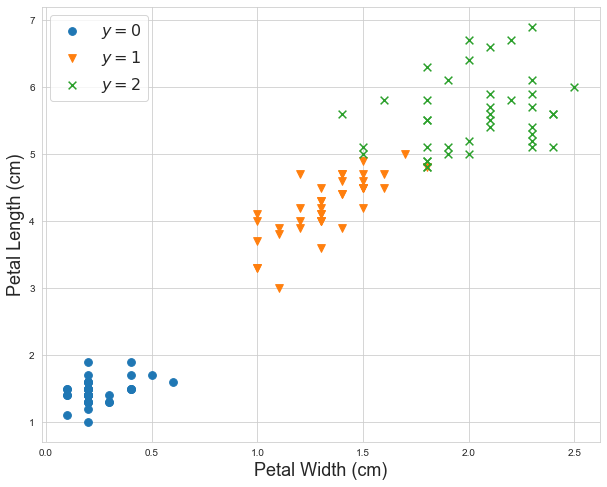

In [6]:
plt.figure(figsize=(10,8))

plt.scatter(X_train.loc[y_train==0].petal_width, 
                X_train.loc[y_train==0].petal_length,
                s = 60,
                label='$y=0$')
plt.scatter(X_train.loc[y_train==1].petal_width, 
                X_train.loc[y_train==1].petal_length,
                marker = 'v',
                s = 60,
                label='$y=1$')
plt.scatter(X_train.loc[y_train==2].petal_width, 
                X_train.loc[y_train==2].petal_length,
                marker = 'x',
                s = 60,
                label='$y=2$')

plt.xlabel("Petal Width (cm)", fontsize=18)
plt.ylabel("Petal Length (cm)", fontsize=18)
plt.legend(fontsize=16)

plt.show()

In [7]:
## import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
## Make LDA object
LDA = LinearDiscriminantAnalysis()

## Fit the model
LDA.fit(X_train[['petal_width', 'petal_length']], y_train)

LinearDiscriminantAnalysis()

In [9]:
## import confusion matrix
from sklearn.metrics import confusion_matrix

In [10]:
conf_mat = confusion_matrix(y_train, LDA.predict(X_train[['petal_width', 'petal_length']]))

In [11]:
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2'])

,Predicted 0,Predicted 1,Predicted 2
Actual 0,40,0,0
Actual 1,0,38,2
Actual 2,0,2,38


## Cross-entropy

A metric that expands nicely to multiclass classification is known as cross-entropy, sometimes known as $\log$-loss for reasons that will soon become clear.

Cross-entropy is a measure of how well two probability distributions align. Here we want to compare the "distribution" of the sample, where we take "distribution" to a set of indicator functions, $y_c = 1_{y=c}$, to the estimated probability distribution from the model.

For each observation, $i$, we have we compute:

$$
-\sum_{c=1}^\mathcal{C} y_{c,i} \log \left( p_{c,i} \right),
$$

where $\mathcal{C}$ is the total number of possible classes and $p_{c,i}$ is the probability that observation $i$ is of class $c$.

The total cross-entropy over the sample is the total sum.

Let's calculate this now by hand, then show how to do it in `sklearn`.

In [12]:
## generate the ycs
ycs = pd.get_dummies(y_train).to_numpy()

In [13]:
ycs

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
## generate the pcs
pcs = LDA.predict_proba(X_train[['petal_width', 'petal_length']])

In [15]:
## take the sum of each rows product
- np.sum(ycs * np.log(pcs), axis=1)

array([4.40483776e-02, 1.46301727e-05, 6.20094724e-04, 3.82021497e-04,
       2.45070630e-12, 1.04340980e-11, 2.82346732e-04, 5.37443091e-08,
       2.48239036e-04, 2.91372789e-05, 1.69434408e-02, 8.00004507e-12,
       4.73354245e-10, 2.67748127e-04, 1.35294091e-02, 3.17880280e-03,
       1.10324637e+00, 1.04340980e-11, 1.63336009e-03, 8.00004507e-12,
       3.72097977e-07, 2.00443332e-04, 1.38324209e-02, 5.04381715e-09,
       3.25037413e-03, 1.44976360e-04, 3.40598660e-11, 8.58273821e-06,
       8.52435900e-11, 1.44976360e-04, 1.44976360e-04, 4.48455534e-05,
       4.73354245e-10, 8.00004507e-12, 1.69434408e-02, 2.14740943e-08,
       3.88960863e-06, 2.45070630e-12, 2.96497782e-09, 2.88713743e-04,
       8.52435900e-11, 1.64940298e-04, 2.10651330e-06, 8.52435900e-11,
       1.43443907e+00, 2.76323374e-05, 2.61139999e-11, 2.30151285e-04,
       2.61139999e-11, 6.97976977e-06, 3.27396978e-02, 2.78258305e-10,
       6.50681509e-01, 1.69434408e-02, 8.54332363e-03, 1.38324209e-02,
      

In [16]:
## sum that sum
np.sum(- np.sum(ycs * np.log(pcs), axis=1))

8.127982067830915

##### In `sklearn`

This can be done with `log_loss` in `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html</a>.

In [17]:
## with sklearn
from sklearn.metrics import log_loss

In [18]:
## implement log_loss on the training set
## first put in the true values
## then the predicted probabilities
## labels are the labels for the three classes [0,1,2]
## normalize=False uses the log-loss formula we presented above
log_loss(y_train, pcs, labels=[0,1,2], normalize=False)

8.127982067830997

#### What is the goal of cross entropy?

Let's think about the formula for a second:

$$
-\sum_{c=1}^\mathcal{C} y_{c,i} \log \left( p_{c,i} \right),
$$

The only term that contributes to this sum is the one corresponding to the class that observation $i$ actually is, say it is $l$. If we know the class of $i$ is $l$, then observation $i$ contributes

$$
- \log \left( p_{l,i} \right)
$$

to the total cross-entropy. When $p_{l,i}$ is closer to $1$,  $- \log \left( p_{l,i} \right)$ is closer to 0. Conversely as $p_{l,i} \rightarrow 0$, $- \log \left( p_{l,i} \right) \rightarrow \infty$. Since we want to assign observation $i$ to its actual class, what we want is a value of $p_{l,i}$ that is close to $1$. The closer to $1$ each of the $p_{l,i}$s are, the closer to $0$ our cross-entropy is. Thus a good model is one with low cross-entropy.

<i>Cross-entropy, "punishes" models that are confidently incorrect because such models would have a very low value for $p_{l,i}$.</i>

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)